#Importation des Bibliothéques

In [34]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#np.set_printoptions(suppress=true). 
#optimisation de l'affichage.

import pandas as pd 
# lecture des fichiers csv ,etc
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore') 
#eviter d'afficher les warnings.

In [35]:
data=pd.read_csv('./credit_scoring.csv', sep=';', header=0)
data.head(3)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0


In [36]:
type(data)
data.shape

(4375, 14)

In [37]:
X=data.iloc[:,:13].values
Y=data.iloc[:,13].values


In [38]:
print(" Mauvais payeurs : {0:.3f}".format(100*sum(Y==0) / len(Y)))
print("Bon payeurs : {0:.3f}".format(100*sum(Y==1) / len(Y)))

 Mauvais payeurs : 27.794
Bon payeurs : 72.206


#Apprentissage

In [39]:
from sklearn.model_selection import train_test_split
#importation des algorithme.  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Importation des metriques et de matrice de confusion.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5,random_state=1)

In [41]:
def classifieur(X_train, X_test, Y_train, Y_test):
    DT=DecisionTreeClassifier(criterion='gini',random_state=1)  #CART
    DT.fit(X_train,Y_train)
    YDT=DT.predict(X_test)
    print(confusion_matrix(Y_test,YDT))
    print("Accuracy = {0:.3f}".format(accuracy_score(Y_test,YDT)))
    print("Precision = {0:.3f}".format(precision_score(Y_test,YDT)))

    print()
    DT=DecisionTreeClassifier(criterion='entropy',random_state=1)  #CART
    DT.fit(X_train,Y_train)
    YDT=DT.predict(X_test)
    print(confusion_matrix(Y_test,YDT))
    print("Accuracy = {0:.3f}".format(accuracy_score(Y_test,YDT)))
    print("Precision = {0:.3f}".format(precision_score(Y_test,YDT)))

    print()
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,Y_train)
    Yknn=knn.predict(X_test)
    print(confusion_matrix(Y_test,Yknn))
    print("Accuracy = {0:.3f}".format(accuracy_score(Y_test,Yknn)))
    print("Precision = {0:.3f}".format(precision_score(Y_test,Yknn)))

    print()
    RF=RandomForestClassifier(n_estimators=100,random_state=1)
    RF.fit(X_train,Y_train)
    YRF=RF.predict(X_test)
    print(confusion_matrix(Y_test,YRF))
    print("Accuracy = {0:.3f}".format(accuracy_score(Y_test,YRF)))
    print("Precision = {0:.3f}".format(precision_score(Y_test,YRF)))

In [42]:
classifieur(X_train, X_test, Y_train, Y_test)

[[ 325  279]
 [ 318 1266]]
Accuracy = 0.727
Precision = 0.819

[[ 323  281]
 [ 323 1261]]
Accuracy = 0.724
Precision = 0.818

[[ 189  415]
 [ 187 1397]]
Accuracy = 0.725
Precision = 0.771

[[ 309  295]
 [ 168 1416]]
Accuracy = 0.788
Precision = 0.828


#Normalisation des données.

In [43]:
#importation des standards de normalisation.
from sklearn.preprocessing import StandardScaler

In [44]:
ss=StandardScaler()
ss.fit(X_train)
X_train_norm=ss.transform(X_train)
X_test_norm=ss.transform(X_test)
classifieur(X_train_norm, X_test_norm, Y_train, Y_test)

[[ 322  282]
 [ 315 1269]]
Accuracy = 0.727
Precision = 0.818

[[ 321  283]
 [ 324 1260]]
Accuracy = 0.723
Precision = 0.817

[[ 286  318]
 [ 223 1361]]
Accuracy = 0.753
Precision = 0.811

[[ 308  296]
 [ 169 1415]]
Accuracy = 0.787
Precision = 0.827


#Amelioration avec la méthode PCA.

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(n_components=3)
pca.fit(X_train_norm)

X1=pca.transform(X_train_norm)
X_train_pca=np.concatenate((X_train_norm,X1),axis=1)

X2=pca.transform(X_test_norm)
X_test_pca=np.concatenate((X_test_norm,X2),axis=1)

In [47]:
classifieur(X_train_pca, X_test_pca, Y_train, Y_test)

[[ 351  253]
 [ 324 1260]]
Accuracy = 0.736
Precision = 0.833

[[ 335  269]
 [ 344 1240]]
Accuracy = 0.720
Precision = 0.822

[[ 283  321]
 [ 212 1372]]
Accuracy = 0.756
Precision = 0.810

[[ 314  290]
 [ 145 1439]]
Accuracy = 0.801
Precision = 0.832


#Selection des Feautures.

In [49]:
features=data.columns[:13]

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


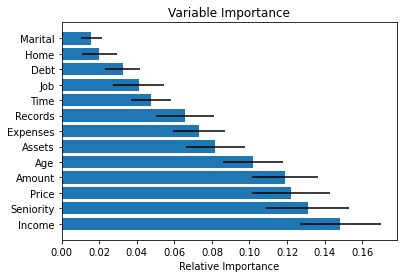

In [50]:
clf = RandomForestClassifier(n_estimators=500) 
clf.fit(X_train_norm, Y_train) 
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
sorted_idx = np.argsort(importances)[::-1]
print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5 
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

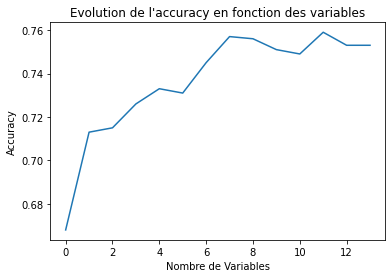

[0.668 0.713 0.715 0.726 0.733 0.731 0.745 0.757 0.756 0.751 0.749 0.759
 0.753 0.753]


In [51]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
    X1_f = X_train_norm[:,sorted_idx[:f+1]]
    X2_f = X_test_norm[:,sorted_idx[:f+1]] 
    KNN.fit(X1_f,Y_train)
    YKNN=KNN.predict(X2_f) 
    scores[f]=np.round(accuracy_score(Y_test,YKNN),3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()
print(scores)

#Choix des paramétres d'un algorithme.

In [52]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1,3,5,7,9,10]}
model = KNeighborsClassifier()
GS = GridSearchCV(model, parameters,scoring='accuracy',cv=10)
grille=GS.fit(X_train_pca, Y_train)
print(grille.best_params_)
print(grille.best_score_)

YKNN_O = grille.predict(X_test_pca)
print("Accuracy_score d'un KNN optimise: {0:.3f}".format(accuracy_score(Y_test,YKNN_O)))

{'n_neighbors': 9}
0.7571949227095639
Accuracy_score d'un KNN optimise: 0.769


In [53]:
parameters = {'criterion': ['gini','entropy'],'max_depth': [1,2,3,4,5,None]}
model = DecisionTreeClassifier(random_state=1)
GS = GridSearchCV(model, parameters,scoring='accuracy',cv=10)
grille=GS.fit(X_train_pca, Y_train)
print(grille.best_params_)
print(grille.best_score_)

YDT_O = grille.predict(X_test_pca)
print("Accuracy_score d'un DT optimise: {0:.3f}".format(accuracy_score(Y_test,YDT_O)))

{'criterion': 'gini', 'max_depth': 4}
0.7649511960118973
Accuracy_score d'un DT optimise: 0.767


#Creation des Pipeline. 

In [54]:
from sklearn.pipeline import Pipeline,FeatureUnion
import pickle #pour stocekr les ficheirs executables.

In [55]:
P = Pipeline([('ss',StandardScaler()),
                    ('FU',FeatureUnion([('ss',StandardScaler()),("pca", PCA(n_components=3))])),
                    ('classifieur',KNeighborsClassifier(n_neighbors=9))
                    ])
P.fit(X_train_norm,Y_train)
pickle.dump(P, open( "pipeline.pkl", "wb" ) )
prediction=P.predict(X_test_norm)
print("Accuracy_score d'un KNN : {0:.3f}".format(accuracy_score(Y_test,prediction)))

Accuracy_score d'un KNN : 0.769


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
import time clfs = {
    'RF': RandomForestClassifier(n_estimators=100,random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'BAG': BaggingClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), alpha=0.001, max_iter=200,random_state=1),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'ST': DecisionTreeClassifier(max_depth=1,random_state=1)
}

SyntaxError: ignored

In [69]:

def run_classifiers (X,Y,clfs):
    kf = KFold(n_splits=5, shuffle=True, random_state=0) 
    for clf_name in clfs:
        begin = time.time()
        clf = clfs[clf_name]
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        end = time.time()
        cv_precision = cross_val_score(clf, X, Y, cv=kf, scoring='precision') 
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} (in {3:.2f} seconds)".format(
                clf_name, np.mean(cv_acc), np.std(cv_acc), end-begin))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(clf_name,
                                                                 np.mean(cv_precision), 
                                                                 np.std(cv_precision)))
        print()

In [ ]:
run_classifiers (X,Y,clfs)

In [ ]:
ss=StandardScaler()
ss.fit(X)
X_norm=ss.transform(X)
run_classifiers (X_norm,Y,clfs)